## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox

## Ignoring the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the data from the csv file using the Pandas Library

In [3]:
house_property_df = pd.read_csv('train.csv')

In [4]:
house_property_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
for column in house_property_df.columns:
    print(f"Column: {column}, Type: {house_property_df[column].dtype}")

Column: Id, Type: int64
Column: MSSubClass, Type: int64
Column: MSZoning, Type: object
Column: LotFrontage, Type: float64
Column: LotArea, Type: int64
Column: Street, Type: object
Column: Alley, Type: object
Column: LotShape, Type: object
Column: LandContour, Type: object
Column: Utilities, Type: object
Column: LotConfig, Type: object
Column: LandSlope, Type: object
Column: Neighborhood, Type: object
Column: Condition1, Type: object
Column: Condition2, Type: object
Column: BldgType, Type: object
Column: HouseStyle, Type: object
Column: OverallQual, Type: int64
Column: OverallCond, Type: int64
Column: YearBuilt, Type: int64
Column: YearRemodAdd, Type: int64
Column: RoofStyle, Type: object
Column: RoofMatl, Type: object
Column: Exterior1st, Type: object
Column: Exterior2nd, Type: object
Column: MasVnrType, Type: object
Column: MasVnrArea, Type: float64
Column: ExterQual, Type: object
Column: ExterCond, Type: object
Column: Foundation, Type: object
Column: BsmtQual, Type: object
Column: B

## We start with cleaning the data

### Let's check the number of values that are null

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    null_counts = house_property_df.isnull().sum()
    print(null_counts)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Checking the Percentage of null values in each column

In [7]:
percent_null = house_property_df.isnull().sum() / len(house_property_df)

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(percent_null*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

### We are going to remove those columns which have null values for equal to or more than 40% of the given datapoints

In [9]:
columns_to_drop = percent_null[percent_null >= 0.4].index
house_property_df.drop(columns=columns_to_drop, inplace=True)

### We will be replacing the null values with the most frequently occurring values since the percentage of null values is very small

In [10]:
house_property_df['GarageCond'].fillna(house_property_df['GarageCond'].mode()[0], inplace=True)
house_property_df['GarageQual'].fillna(house_property_df['GarageQual'].mode()[0], inplace=True)
house_property_df['GarageFinish'].fillna(house_property_df['GarageFinish'].mode()[0], inplace=True)
house_property_df['GarageYrBlt'].fillna(house_property_df['GarageYrBlt'].mode()[0], inplace=True)
house_property_df['GarageType'].fillna(house_property_df['GarageType'].mode()[0], inplace=True)
house_property_df['Electrical'].fillna(house_property_df['Electrical'].mode()[0], inplace=True)
house_property_df['BsmtFinType2'].fillna(house_property_df['BsmtFinType2'].mode()[0], inplace=True)
house_property_df['BsmtFinType1'].fillna(house_property_df['BsmtFinType1'].mode()[0], inplace=True)
house_property_df['BsmtExposure'].fillna(house_property_df['BsmtExposure'].mode()[0], inplace=True)
house_property_df['BsmtCond'].fillna(house_property_df['BsmtCond'].mode()[0], inplace=True)
house_property_df['BsmtQual'].fillna(house_property_df['BsmtQual'].mode()[0], inplace=True)
house_property_df['MasVnrType'].fillna(house_property_df['MasVnrType'].mode()[0], inplace=True)

### We will be replacing the null values of LotFrontage with its median value

In [11]:
house_property_df['LotFrontage'].fillna(house_property_df['LotFrontage'].median(), inplace=True)
house_property_df['MasVnrArea'].fillna(house_property_df['MasVnrArea'].median(), inplace=True)

### We will drop the column 'id' as it is an unnecessary value which will be of no use in our analysis

In [12]:
house_property_df.drop(columns=['Id'], axis=1, inplace=True)

### Setting up mapping for ordinal variables and also converting some of them into object values

In [13]:
# house_property_df['MSSubClass'] = house_property_df['MSSubClass'].astype(str)
mssubclass_mapping = {
    20: '1-Story 1946 & Newer',
    30: '1-Story 1945 & Older',
    40: '1-Story w/Finished Attic All Ages',
    45: '1-1/2 Story Unfinished All Ages',
    50: '1-1/2 Story Finished All Ages',
    60: '2-Story 1946 & Newer',
    70: '2-Story 1945 & Older',
    75: '2-1/2 Story All Ages',
    80: 'Split or Multi-Level',
    85: 'Split Foyer',
    90: 'Duplex - All Styles and Ages',
    120: '1-Story PUD 1946 & Newer',
    150: '1-1/2 Story PUD All Ages',
    160: '2-Story PUD 1946 & Newer',
    180: 'PUD Multi-Level - Incl Split Lev/Foyer',
    190: '2 Family Conversion - All Styles and Ages'
}

# Assuming df is your DataFrame
house_property_df['MSSubClass'] = house_property_df['MSSubClass'].map(mssubclass_mapping)

In [14]:
quality_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}
house_property_df['ExterQual'] = house_property_df['ExterQual'].map(quality_mapping)

In [15]:
condition_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}
house_property_df['ExterCond'] = house_property_df['ExterCond'].map(condition_mapping)

In [16]:
heating_qc_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}
house_property_df['HeatingQC'] = house_property_df['HeatingQC'].map(heating_qc_mapping)

In [17]:
kitchen_qual_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}
house_property_df['KitchenQual'] = house_property_df['KitchenQual'].map(kitchen_qual_mapping)

### We will now convert the categorical variables into dummy variables

In [18]:
num_col=[]
cat_col=[]
for i in house_property_df.columns:
    if house_property_df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)

In [19]:
df_dummy = pd.get_dummies(house_property_df[cat_col])   
house_property_df = pd.concat([house_property_df, df_dummy], axis=1)
house_property_df = house_property_df.drop(cat_col, axis=1) 

## We will now start with the Regression Process

### Separate the dependent variable and the independent variables

In [20]:
X = house_property_df.drop('SalePrice',axis=1)
y = house_property_df['SalePrice']

### Plotting the distribution of the 'SalePrice' data

<Axes: xlabel='SalePrice', ylabel='Density'>

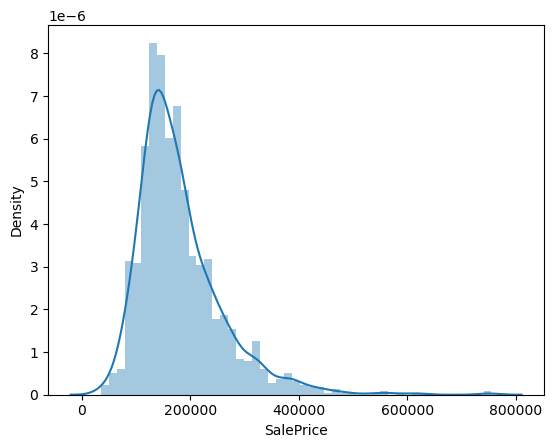

In [21]:
sns.distplot(y)

### Transforming the 'SalePrice' dependent variable to handle positive skewness

In [22]:
y_transformed, _ = boxcox(y)

### We now plot the transformed 'SalePrice' variable to check if skewness has been handled

<Axes: ylabel='Density'>

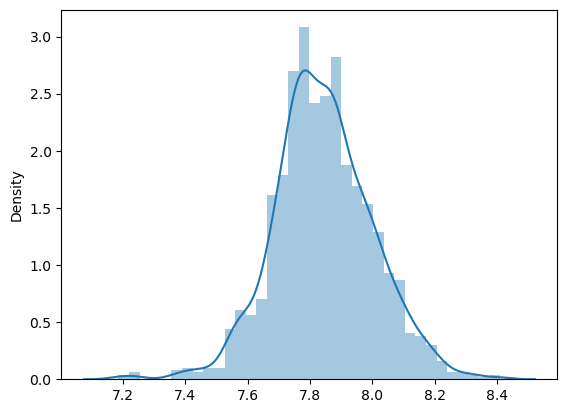

In [23]:
sns.distplot(y_transformed)

#### Even though the transformed variable seems slightly negatively skewed. The transformation is good enough for the analysis

### Split the data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.20, random_state=100)

### Apply scaling on all numerical variables so that any of them will not skew the model

In [25]:
# Scaling the data using a Minmax Scaler. Of course, we wil remove 'SalePrice' as it is the dependent variable
scaler = MinMaxScaler()
num_col.remove('SalePrice')

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

### Setting up the alpha values for testing

In [26]:
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 ]}

### Executing Ridge Regression

In [27]:
ridge = Ridge()

# cross validation

folds = 10
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.001,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [28]:
# Printing the best hyperparameter alpha based on the Cross Validation Approach
print(ridge_model_cv.best_params_)

{'alpha': 0.2}


In [29]:
#Fitting Ridge model for the best hyperparameter alpha value and printing coefficients which have been penalised
alpha = ridge_model_cv.best_params_["alpha"]
ridge = Ridge(alpha=5.0)

ridge.fit(X_train, y_train)

Ridge(alpha=5.0)

In [30]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.9210818638566849
0.8946886110450087


### Printing the top 5 variables that have an impact on the price of the house (Ridge Regression)

In [31]:
coef_dict = pd.Series(ridge.coef_, index=X_train.columns)
sorted_coef = coef_dict.abs().sort_values(ascending=False)
n = 5
top_n_features = sorted_coef.head(n).index.tolist()
print("Top", n, "features that play a major role in the prediction:")
_ = [print(f"{index}. {item}") for index, item in enumerate(top_n_features, start=1)]

Top 5 features that play a major role in the prediction:
1. OverallQual
2. GrLivArea
3. MSZoning_C (all)
4. 1stFlrSF
5. RoofMatl_ClyTile


### Execute Lasso Regression

In [32]:
lasso = Lasso()

# cross validation
folds = 10
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.001,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [33]:
# Printing the best hyperparameter alpha based on the Cross Validation Approach
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [34]:
#Fitting Ridge model for the best hyperparameter alpha value and printing coefficients which have been penalised

alpha = lasso_model_cv.best_params_["alpha"]

lasso = Lasso(alpha=0.0005)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0005)

In [35]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8971606767403677
0.8941131694342991


### Printing the top 5 variables that have an impact on the price of the house (Lasso Regression)

In [36]:
coef_dict = pd.Series(lasso.coef_, index=X_train.columns)
sorted_coef = coef_dict.abs().sort_values(ascending=False)
n = 5
top_n_features = sorted_coef.head(n).index.tolist()
print("Top", n, "features that play a major role in the prediction:")
_ = [print(f"{index}. {item}") for index, item in enumerate(top_n_features, start=1)]

Top 5 features that play a major role in the prediction:
1. GrLivArea
2. OverallQual
3. GarageCars
4. MSZoning_C (all)
5. OverallCond


# Question : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

## Ridge Regression

In [37]:
X_train_ridge = X_train.drop(['OverallQual', 'GrLivArea', 'MSZoning_C (all)', '1stFlrSF', 'RoofMatl_ClyTile'], axis=1)
X_test_ridge = X_test.drop(['OverallQual', 'GrLivArea', 'MSZoning_C (all)', '1stFlrSF', 'RoofMatl_ClyTile'], axis=1)

In [38]:
ridge = Ridge(alpha=5.0)
ridge.fit(X_train_ridge, y_train)

Ridge(alpha=5.0)

In [39]:
y_pred_train = ridge.predict(X_train_ridge)
y_pred_test = ridge.predict(X_test_ridge)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.9075821231938919
0.8739522967706461


In [40]:
coef_dict = pd.Series(ridge.coef_, index=X_train_ridge.columns)
sorted_coef = coef_dict.abs().sort_values(ascending=False)
n = 5
top_n_features = sorted_coef.head(n).index.tolist()
print("Top", n, "features that play a major role in the prediction:")
_ = [print(f"{index}. {item}") for index, item in enumerate(top_n_features, start=1)]

Top 5 features that play a major role in the prediction:
1. TotRmsAbvGrd
2. 2ndFlrSF
3. OverallCond
4. FullBath
5. TotalBsmtSF


## Lasso Regression

In [41]:
X_train_lasso = X_train.drop(['OverallQual', 'GrLivArea', 'MSZoning_C (all)', 'GarageCars', 'OverallCond'], axis=1)
X_test_lasso = X_test.drop(['OverallQual', 'GrLivArea', 'MSZoning_C (all)', 'GarageCars', 'OverallCond'], axis=1)

In [42]:
lasso = Lasso(alpha=0.0005)        
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.0005)

In [43]:
y_pred_train = lasso.predict(X_train_lasso)
y_pred_test = lasso.predict(X_test_lasso)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.879937644879954
0.8563315105460042


In [44]:
coef_dict = pd.Series(ridge.coef_, index=X_train_lasso.columns)
sorted_coef = coef_dict.abs().sort_values(ascending=False)
n = 5
top_n_features = sorted_coef.head(n).index.tolist()
print("Top", n, "features that play a major role in the prediction:")
_ = [print(f"{index}. {item}") for index, item in enumerate(top_n_features, start=1)]

Top 5 features that play a major role in the prediction:
1. TotRmsAbvGrd
2. 2ndFlrSF
3. YearBuilt
4. FullBath
5. HeatingQC
